In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import preprocess_seroetr as ps

In [3]:
df=pd.read_csv("hate_speech_data.csv", index_col=0)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.shape

(24783, 6)

In [5]:
# csv adress: 'https://raw.githubusercontent.com/laxmimerit/hate_speech_dataset/master/data.csv'
# classes--->  | 0 - hate speech | 1 - offensive language | 2 - neither |

In [6]:
df["class"].value_counts()
# imbalanced data

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [7]:
value_count=df["class"].value_counts()

In [8]:
index=list(value_count.index)
counter=min(value_count.values)

In [9]:
counter, index

(1430, [1, 2, 0])

In [10]:
df_balanced=pd.DataFrame()
for i in index:
    temp=df[df["class"]==i].sample(counter)
    df_balanced=df_balanced.append(temp,ignore_index=True)

C:\Users\developer\AppData\Local\Temp\ipykernel_7696\1285612948.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced=df_balanced.append(temp,ignore_index=True)


In [11]:
df=df_balanced.copy()

In [12]:
df.shape

(4290, 6)

In [13]:
df["class"].value_counts()

1    1430
2    1430
0    1430
Name: class, dtype: int64

In [14]:
count=df["tweet"].shape[0]
count

4290

In [15]:
def clean_data(x):
    x=str(x).lower().replace("\\"," ").replace("_"," ")
    x=ps.get_cont_to_exp(x)
    x=ps.remove_emails(x)
    x=ps.remove_urls(x)
    x=ps.remove_html_tags(x)
    x=ps.remove_rt(x)
    x=ps.remove_accented_chars(x)
    x=ps.remove_special_chars(x)
    x=re.sub("(.)\\1{2,}","\\1",x)
    
    return x

In [16]:
x="hiiiii@ hooowww arrreeeeee# yooouuuu!"
clean_data(x)

'hi how are you'

In [17]:
df["tweet"]=df["tweet"].apply(lambda x: clean_data(x))

c:\users\developer\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [18]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,3,0,1,katt0 i am snatching all your bitches at my le...
1,3,0,3,0,1,this bitch wanna smoke all of my weed
2,3,0,3,0,1,kieffer jason bitch whos fucking playing but y...
3,3,0,3,0,1,ladies remember other women including your fri...
4,3,0,3,0,1,big bitches be sayin why yo eyes all on my sto...


#### Text Tokenization

In [19]:
text=df["tweet"].tolist()
text[:4]

['katt0 i am snatching all your bitches at my leisure',
 'this bitch wanna smoke all of my weed',
 'kieffer jason bitch whos fucking playing but you and how would you know what i smoke i do not fuck with friendly ass niggas',
 'ladies remember other women including your friends are trifling you speak too great about your nigga other bitches will try him smh lol']

In [20]:
tokens=Tokenizer()
tokens.fit_on_texts(text) #Updates internal vocabulary based on a list of texts.

In [21]:
help(tokens)

Help on Tokenizer in module keras.preprocessing.text object:

class Tokenizer(builtins.object)
 |  Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, analyzer=None, **kwargs)
 |  
 |  Text tokenization utility class.
 |  
 |  Deprecated: `tf.keras.preprocessing.text.Tokenizer` does not operate on
 |  tensors and is not recommended for new code. Prefer
 |  `tf.keras.layers.TextVectorization` which provides equivalent functionality
 |  through a layer which accepts `tf.Tensor` input. See the
 |  [text loading tutorial](https://www.tensorflow.org/tutorials/load_data/text)
 |  for an overview of the layer and text handling in tensorflow.
 |  
 |  This class allows to vectorize a text corpus, by turning each
 |  text into either a sequence of integers (each integer being the index
 |  of a token in a dictionary) or into a vector where the coefficient
 |  for each token could be binary, based on word count, based

In [22]:
len(tokens.word_counts)
# unique words - vocab size

11588

In [23]:
tokens.word_counts
# words and their frequencies

OrderedDict([('katt0', 1),
             ('i', 1499),
             ('am', 374),
             ('snatching', 1),
             ('all', 262),
             ('your', 314),
             ('bitches', 272),
             ('at', 206),
             ('my', 532),
             ('leisure', 1),
             ('this', 375),
             ('bitch', 815),
             ('wanna', 49),
             ('smoke', 11),
             ('of', 525),
             ('weed', 11),
             ('kieffer', 17),
             ('jason', 18),
             ('whos', 11),
             ('fucking', 135),
             ('playing', 13),
             ('but', 225),
             ('you', 1217),
             ('and', 782),
             ('how', 119),
             ('would', 105),
             ('know', 123),
             ('what', 153),
             ('do', 374),
             ('not', 639),
             ('fuck', 220),
             ('with', 291),
             ('friendly', 4),
             ('ass', 260),
             ('niggas', 142),
             ('ladies

In [24]:
print(tokens.index_word) #numerical digits are given to words in dictionary format

{1: 'a', 2: 'i', 3: 'the', 4: 'you', 5: 'to', 6: 'is', 7: 'bitch', 8: 'and', 9: 'not', 10: 'that', 11: 'in', 12: 'my', 13: 'of', 14: 'it', 15: 'like', 16: 'on', 17: 'trash', 18: 'me', 19: 'for', 20: 'this', 21: 'am', 22: 'do', 23: 'be', 24: 'your', 25: 'are', 26: 'with', 27: 'bitches', 28: 'all', 29: 'ass', 30: 'they', 31: 'up', 32: 'just', 33: 'if', 34: 'so', 35: 'he', 36: 'hoes', 37: 'but', 38: 'fuck', 39: 'was', 40: 'nigga', 41: 'get', 42: 'at', 43: 'faggot', 44: 'have', 45: 'no', 46: 'when', 47: 'got', 48: 'hoe', 49: 'she', 50: 'pussy', 51: 'these', 52: 'shit', 53: 'out', 54: 'lol', 55: 'can', 56: 'white', 57: 'what', 58: 'about', 59: 'niggas', 60: 'we', 61: 'fucking', 62: 'or', 63: 'will', 64: 'who', 65: 'her', 66: 'from', 67: 'know', 68: 'one', 69: 'as', 70: 'his', 71: 'youre', 72: 'how', 73: 'them', 74: 'nigger', 75: 'go', 76: 'some', 77: 'bird', 78: 'man', 79: 'an', 80: 'would', 81: 'now', 82: 'love', 83: 'think', 84: 'hate', 85: 'people', 86: 'yankees', 87: 'see', 88: 'yall', 

In [25]:
x=["how are you"]

In [26]:
print(tokens.texts_to_sequences(x))

[[72, 25, 4]]


In [27]:
vocab_size=len(tokens.word_counts)+1

In [28]:
encoded_text=tokens.texts_to_sequences(text)

In [29]:
print(encoded_text)

[[3832, 2, 21, 3833, 28, 24, 27, 42, 12, 3834], [20, 7, 152, 558, 28, 13, 12, 559], [394, 367, 7, 560, 61, 484, 37, 4, 8, 72, 80, 4, 67, 57, 2, 558, 2, 22, 9, 38, 26, 1330, 29, 59], [1680, 368, 175, 236, 3835, 24, 334, 25, 2337, 4, 657, 93, 316, 58, 24, 40, 175, 27, 63, 261, 143, 187, 54], [226, 27, 23, 839, 97, 90, 427, 28, 16, 12, 2338, 7, 97, 90, 2338, 28, 11, 12, 427], [3836, 317, 412, 7], [72, 4, 3837, 3838, 46, 71, 2339, 58, 453, 3, 207, 52, 353, 485, 6, 1681, 8, 2339, 58, 20, 1331, 6, 17, 90], [2, 84, 46, 202, 94, 2, 21, 519, 37, 12, 720, 6, 954, 7, 10, 40, 22, 9, 82, 4, 395, 16], [3839, 721, 12, 1682, 7, 57, 12, 520, 1683, 3840], [3841, 46, 1, 7, 94, 2, 82, 4, 237, 65, 144, 3, 3842, 3843, 94, 22, 4, 14, 232, 3844, 13, 3, 104, 1332, 3, 175, 454, 521], [24, 7, 162, 137, 49, 152, 38, 1, 117, 40], [3845, 22, 4, 203, 4, 153, 93, 3846, 115, 118, 1, 7], [522, 428, 147, 27, 116, 188, 52], [2340, 59, 23, 15, 2, 41, 238, 658, 3, 50, 4, 41, 955, 16, 4, 1684, 238, 658, 956, 6, 1685], [10, 

In [30]:
max_length=120 #input_lenght for Embedding function
X=pad_sequences(encoded_text,maxlen=max_length,padding="post")

In [31]:
print(X)

[[ 3832     2    21 ...     0     0     0]
 [   20     7   152 ...     0     0     0]
 [  394   367     7 ...     0     0     0]
 ...
 [11587 11588    12 ...     0     0     0]
 [ 3640   151    56 ...     0     0     0]
 [  394   367     7 ...     0     0     0]]


In [32]:
X.shape

(4290, 120)

#### Model building

In [33]:
y=df["class"]

In [34]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
4285    0
4286    0
4287    0
4288    0
4289    0
Name: class, Length: 4290, dtype: int64


In [35]:
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [36]:
y=np_utils.to_categorical(df["class"])
print(y)
# one hot encoding

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [37]:
df["class"].loc[1622]

2

In [38]:
y[1622]

array([0., 0., 1.], dtype=float32)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [40]:
X_train.shape, X_test.shape

((3432, 120), (858, 120))

#### Model

In [41]:
vector_size=300
model=Sequential()
model.add(Embedding(vocab_size,vector_size,input_length=max_length))

model.add(Conv1D(32,2,activation="relu"))
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
#since we dont have a huge data, ı just use single layer model for CNN.

model.add(Dense(32,activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(3,activation="softmax")) # Unit number is 3 since we have 3 different classes 
# sigmoid for binary, softmax for multiclassification


In [42]:
model.compile(optimizer=Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=2, validation_data=(X_test,y_test),shuffle=True)

Epoch 1/2
108/108 [==============================] - 12s 103ms/step - loss: 0.9602 - accuracy: 0.5763 - val_loss: 0.6781 - val_accuracy: 0.7692
Epoch 2/2
108/108 [==============================] - 11s 104ms/step - loss: 0.5180 - accuracy: 0.8121 - val_loss: 0.5040 - val_accuracy: 0.8042


#### Testing

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [44]:
y_pred=np.argmax(model.predict(X_test),axis=-1)
print(y_pred)

27/27 [==============================] - 0s 8ms/step
[2 2 2 2 2 0 2 1 0 1 1 2 1 0 2 0 1 2 2 0 0 2 1 0 2 2 0 2 2 0 0 1 2 0 0 2 2
 0 1 2 2 2 1 1 0 0 2 2 2 0 1 1 1 1 2 1 1 1 2 0 2 2 0 0 0 0 1 2 1 0 1 0 0 2
 0 0 0 0 0 2 1 1 0 1 1 0 1 2 0 1 1 0 1 1 0 1 2 2 2 0 1 1 2 0 0 0 2 0 0 0 2
 0 0 0 1 1 1 2 0 2 0 2 1 0 2 1 1 0 1 2 0 2 2 1 1 0 2 2 2 2 1 0 2 2 0 2 1 1
 1 2 0 0 1 1 2 2 0 2 0 0 2 0 2 0 0 0 2 0 1 2 0 0 2 0 1 1 2 0 0 1 2 1 1 1 2
 1 0 1 0 0 2 2 0 2 1 2 0 0 2 2 2 0 2 2 1 0 0 0 2 1 1 1 2 2 1 2 1 0 2 0 1 2
 1 1 2 2 1 2 2 0 0 1 2 2 1 0 1 1 1 1 1 1 1 0 2 1 2 2 2 0 2 2 0 1 1 2 2 2 1
 1 1 0 1 2 0 2 0 1 1 2 1 2 2 2 0 2 1 1 1 1 1 2 0 2 0 0 2 0 0 2 1 1 2 1 0 2
 0 0 1 1 2 2 2 0 2 2 2 0 0 1 2 2 0 0 1 2 0 0 1 1 2 2 1 0 2 2 1 2 0 0 0 2 1
 1 2 2 0 2 1 2 2 2 2 0 1 0 2 0 2 2 1 2 2 2 2 1 0 2 0 1 2 0 1 2 0 1 0 1 2 0
 2 1 1 1 2 0 0 2 0 2 2 0 2 0 0 0 2 1 0 2 2 0 1 0 2 0 0 0 1 2 1 2 1 0 2 1 0
 2 1 1 2 1 1 1 1 0 2 1 2 2 0 0 1 0 1 0 1 1 2 0 0 0 1 2 1 2 0 2 1 0 0 2 1 0
 0 1 2 1 1 1 0 2 2 1 2 2 1 1 0 0 1 0 2 2 2 0 1 

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

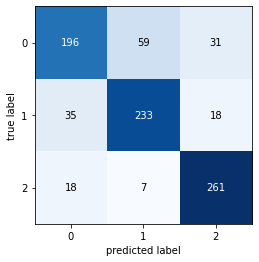

In [45]:
plot_confusion_matrix(confusion_matrix(np.argmax(y_test,axis=-1),y_pred))

In [46]:
print(classification_report(np.argmax(y_test,axis=-1),y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73       286
           1       0.78      0.81      0.80       286
           2       0.84      0.91      0.88       286

    accuracy                           0.80       858
   macro avg       0.80      0.80      0.80       858
weighted avg       0.80      0.80      0.80       858



#### Testing with the custom unseen data

In [47]:
x="hey man whass uppp"

In [48]:
def encode_data(x):
    x=clean_data(x)
    x=tokens.texts_to_sequences([x])
    x=pad_sequences(x,maxlen=max_length,padding="post")
    return x

In [49]:
encode_data(x)

array([[309,  78,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]])

In [50]:
np.argmax(model.predict(encode_data(x)),axis=-1)

1/1 [==============================] - 0s 29ms/step


array([2], dtype=int64)

In [51]:
# classes--->  | 0 - hate speech | 1 - offensive language | 2 - neither |

In [52]:
x="hey bitch whass uppp"

In [53]:
np.argmax(model.predict(encode_data(x)),axis=-1)

1/1 [==============================] - 0s 27ms/step


array([1], dtype=int64)

In [54]:
x="I don't give a fuck "

In [55]:
np.argmax(model.predict(encode_data(x)),axis=-1)

1/1 [==============================] - 0s 32ms/step


array([0], dtype=int64)

In [56]:
# classes--->  | 0 - hate speech | 1 - offensive language | 2 - neither |

In [57]:
model.save("model_hate_speech.h5")

In [58]:
import pickle

In [60]:
pickle.dump(tokens,open("tokens.pkl","wb"))